In [32]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
data = pd.read_csv('G:\CoachX\Data Science\Capstone Projects\Health Costs Calculator\health_costs.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
# One-hot encode categorical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])



In [7]:
# Prepare the features and labels
X = data.drop('expenses', axis=1)
y = data['expenses']

In [8]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Apply the preprocessor to the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [11]:
# Create the model with an Input layer
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

In [14]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=2)
print(f'Mean Absolute Error on test data: {loss}')

9/9 - 0s - 5ms/step - loss: 3149.4597
Mean Absolute Error on test data: 3149.459716796875


In [23]:
# Predict the expenses
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


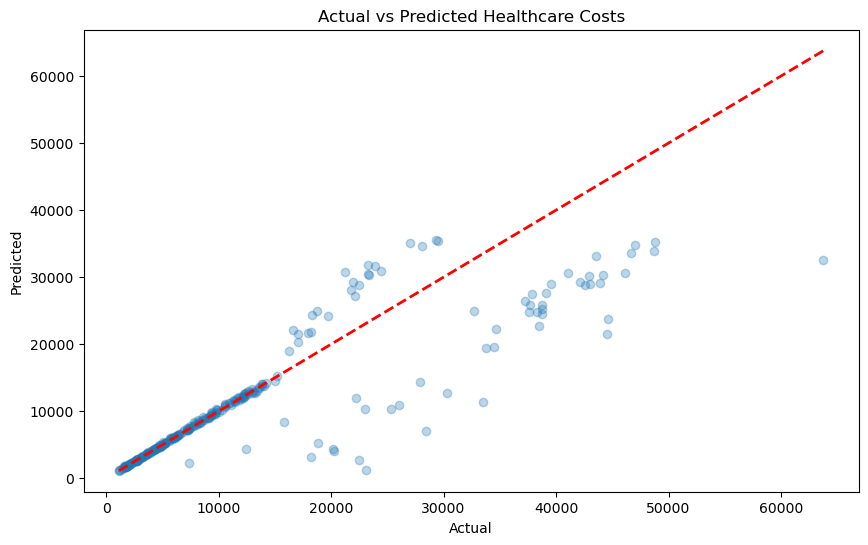

In [31]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Healthcare Costs')
plt.show()